# Overview
In this task, we will: 

1. Using an LLM model to generate a story based on a given keyword with a **fantasy adventure theme.**
2. Using a second LLM model to create an image generation prompt from the generated story.
3. Generating an image based on the created prompt using the Hugging Face API.

## Part 1: Generate a Story

### Input a Keyword:

- Choose a keyword for the story. For example, "Dublin" or "Tehran"

### Generate a Story:

- Use an LLM model to generate a story based on the keyword with a fantasy adventure theme.

## Part 2: Create an Image Generation Prompt

### Generate a Prompt:

- Use a second LLM model to extract an image generation prompt from the story.

## Part 3: Generate the Image

### Create the Image:

- Use the generated prompt to create an image using the Hugging Face API.

## Part 4: Report to User

- Provide both the story and image to the user



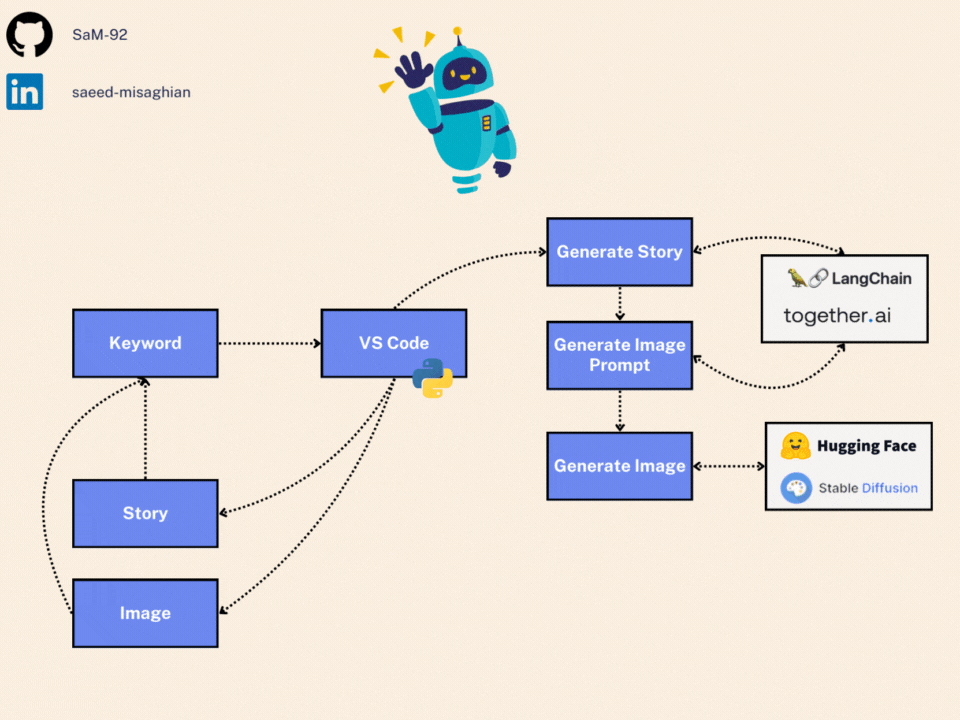

# Install Required Libraries

In [1]:
!pip install transformers diffusers huggingface_hub langchain openai langchain_together


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.6/990.6 kB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.7/336.7 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing

#Configure API Keys


In [2]:
#@title Enter Your API Keys
TOGETHER_API_KEY = ""  # @param {type:"string"}
HUGGING_FACE_API_KEY = ""  # @param {type:"string"}

if TOGETHER_API_KEY == "your_together_api_key_here":
    raise ValueError("Please enter your Together API key in the field above.")
if HUGGING_FACE_API_KEY == "your_hugging_face_api_key_here":
    raise ValueError("Please enter your Hugging Face API key in the field above.")

print("API keys have been entered successfully.")


API keys have been entered successfully.


#Generate a Story Based on a Keyword

In [11]:
from langchain_together import ChatTogether, Together
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

# Initialize ChatTogether with your model choice
story_llm = ChatTogether(
    together_api_key=TOGETHER_API_KEY,
    model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo"
)


# Define a prompt template for generating a story
story_template = ChatPromptTemplate.from_messages([
    ("system", "ٌWrite a story with a fantasy adventure theme based on {keyword}")]) #Write Prompt here

# Create an LLMChain instance
story_chain = LLMChain(llm=story_llm, prompt=story_template)

# Invoke the chain with user input
keyword = "Dublin"

story = story_chain.invoke({"keyword": keyword})

# Print the result
print("Generated Story:", story['text'])


Generated Story: In the misty streets of Dublin, where the River Liffey flowed like a serpent through the heart of the city, a young adventurer named Aisling stumbled upon a mysterious shop tucked away on a narrow alley. The sign above the door read "Maeve's Curios and Antiques," and the windows were filled with a dazzling array of strange and exotic items.

Aisling, a brave and curious lass from the north side of the city, pushed open the door and stepped inside. The shop was a treasure trove of wonders, with shelves upon shelves of peculiar trinkets, ancient tomes, and glowing artifacts that seemed to pulse with a soft, ethereal light.

Behind the counter, an enigmatic woman with piercing green eyes and a wild tangle of curly red hair smiled warmly at Aisling. "Welcome, lass," Maeve said, her voice like a gentle brook. "I have just the thing for a young adventurer such as yourself."

As Aisling browsed the shelves, Maeve revealed to her that the shop was a nexus, a crossroads between

# Part 2: Create an Image Generation Prompt


In [18]:
# Configure Together API for prompt generation
prompt_llm = Together(
    model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
    together_api_key=TOGETHER_API_KEY
)
# Define a prompt template for generating an image prompt
image_prompt_template = ChatPromptTemplate.from_template("You are an artist. Write a description of an image based on this story: {story}")
image_prompt_chain = LLMChain(llm=prompt_llm, prompt=image_prompt_template)

# Generate image prompt
#ToDo
image_prompt = image_prompt_chain.run({"story": story})
print("Generated Image Prompt:", image_prompt)

/usr/local/lib/python3.10/dist-packages/langchain_together/llms.py:93: UserWarning: The completions endpoint, has 'max_tokens' as required argument. The default value is being set to 200 Consider setting this value, when initializing LLM
  warnings.warn(


Generated Image Prompt:   # Artistic Description of the Image: The image depicts a mystical and enchanting scene set in the heart of Dublin. In the foreground, a young adventurer named Aisling stands confidently, her eyes shining with a sense of wonder and determination. She is dressed in a flowing white cloak, adorned with intricate Celtic patterns that seem to shimmer in the soft, ethereal light of the city. Behind her, the misty streets of Dublin stretch out like a serpent, winding through the city's ancient stone walls and alleys. The River Liffey flows gently in the distance, its waters reflecting the city's vibrant colors and textures. Above the city, a full moon rises, casting a silver glow over the scene. In the background, the silhouette of the Dublin Mountains looms, their rugged peaks shrouded in a misty veil. The image is dominated by a sense of mystery and enchantment, as if the very fabric of reality is woven with magic and wonder. The colors are


# Part 3: Generate the Image


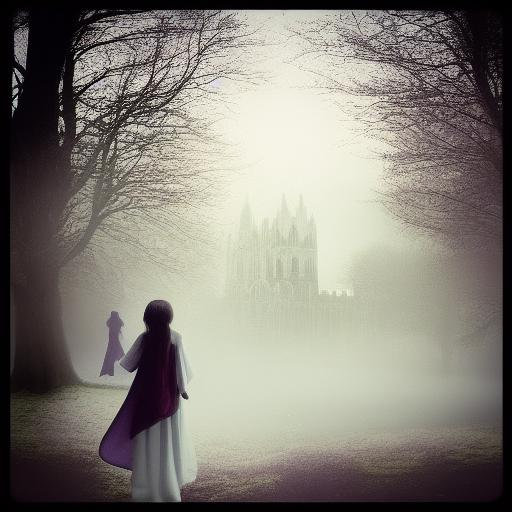

In [24]:
import requests
from PIL import Image
from io import BytesIO
import IPython.display as display

# Hugging Face API URL for Stable Diffusion model
api_url = "https://api-inference.huggingface.co/models/CompVis/stable-diffusion-v1-4"

headers = {
    "Authorization": f"Bearer {HUGGING_FACE_API_KEY}"
}

# Define the JSON payload
payload = {
    "inputs": image_prompt
}

# Generate image from text prompt using Hugging Face API
response = requests.post(api_url, headers=headers, json=payload)

# Handle response
if response.status_code == 200:
    image_bytes = response.content
    image = Image.open(BytesIO(image_bytes))
    display.display(image)
else:
    print("Error generating image:", response.text)
